<a href="https://colab.research.google.com/github/zhuan0122/Machine_Learing_Handson_Python_in_Data_science/blob/master/REINFORCEMENT_LEARNING_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [15]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [16]:
import random
N=500 # UCB canot figure out the best ad with 500 rounds but Thompson sampling can 
d=10
ads_selected = []
numbers_of_rewards_1=[0]*d
numbers_of_rewards_0=[0]*d
sum_of_rewards=[0]*d
total_rewards=0
for n in range(0,N):
  ad=0
  max_random=0
  for i in range(0,d):
    #we do not need to check if there is ad selected, because it is random and in UCB because the dominator N_i cannot be zero. 
    # it is assumed that all ads are displayed to the users and calculate the random 
    random_theta=random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    # since we do not need to make sure there must has ad selected, so we do not need to do the trick but we need to find the highest random
    if (random_theta > max_random):
      max_random=random_theta
      ad = i 
  ads_selected.append(ad) # selected here is find most popular ads so it will give higest clicking according to the given data set
  reward=dataset.values[n,ad]
  if reward ==1:
    numbers_of_rewards_1[ad]=numbers_of_rewards_1[ad]+1
  else:
    numbers_of_rewards_0[ad]=numbers_of_rewards_0[ad]+1
  sum_of_rewards[ad]=sum_of_rewards[ad]+reward
  total_rewards=total_rewards+reward


## Visualising the results - Histogram

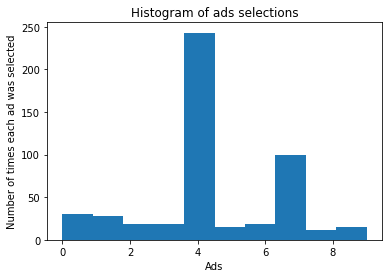

In [17]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

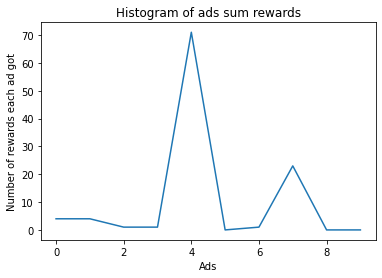

In [18]:
plt.plot(sum_of_rewards)
plt.title('Histogram of ads sum rewards')
plt.xlabel('Ads')
plt.ylabel('Number of rewards each ad got')
plt.show()